# RFM Customer Segmentation for a Retail Shop
An e-commerce company wants to segment its customers and determine marketing strategies according to these segments. To this end, we will define customers' behavior and create groups according to clusters in these behaviors. In other words, we will include those who exhibit common behaviors in the same groups and we will try to develop special sales and marketing techniques for these groups.

I'm going to use RFM which stands for Recency, Frequency, and Monetary Value. It is a marketing framework that is used to analyze customer behavior and segment customers into groups based on their past purchasing habits.

The RFM analysis is based on the following three metrics:

Recency - How recently a customer has made a purchase.
Frequency - How often a customer makes purchases.
Monetary Value - How much a customer spends on each purchase.

The RFM formula involves assigning a score to each metric, which is then used to segment customers into different groups. The scores are typically ranked on a scale of 1 to 5, with 5 being the highest score.

The RFM formula can be written as follows:

RFM Score = (R Score * 100) + (F Score * 10) + M Score

Where:
R Score = a score based on how recently the customer made a purchase (e.g., 5 for most recent, 1 for least recent)
F Score = a score based on how frequently the customer makes purchases (e.g., 5 for most frequent, 1 for least frequent)
M Score = a score based on how much the customer spends on each purchase (e.g., 5 for highest spend, 1 for lowest spend)

By segmenting customers into different groups based on their RFM scores, businesses can tailor their marketing strategies and offers to better meet the needs and preferences of each group, ultimately leading to increased customer loyalty and revenue.


- ## Dataset 
    - InvoiceNo: Invoice number. Nominal. A 6-digit integral number is uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a ---cancellation.
    - StockCode: Product (item) code. Nominal. A 5-digit integral number is uniquely assigned to each specific product.
    - Description: Product (item) name. Nominal.
    - Quantity: The quantities of each product (item) per transaction. Numeric.
    - InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.
    - UnitPrice: Unit price. Numeric. Product price per unit in sterling ( £).
    - CustomerID: Customer number. Nominal. A 5-digit integral number is uniquely assigned to each customer.
    - Country: Country name. Nominal. The name of the country where a customer resides.
 
## Project Overview

### 1 -  Exploring Dataset
   - Check data shape
   - Check data type
   - See if there is any null values
   - See if customers have frequency in their purchases
   - Check the first and last recorded purchases

### 2 - Data Preprocessing
- Drop null values 
- Only keep recoreds with real purchasing
- Create a new column call ***TotalAmount*** shows total amount of money customer spent on order
- Reformat InvoiceDate to datetime

## 3 - Calculating RFM Score
- Calculating Recency
- Calculating Frequency
- Calculating Monetary
- Score R and F and M based on their quantile
- Segment customers based on their RFM score max = 555 and min = 111

## 4 - Analyzing Segments
- How many customers belong to each Segment?
- AVG customers total amount spent
- What's Yearly total amount and quantity sold?
- What country are the customers from?
- What country are the champion customers from?
- Most Frequently bought product by customers of each segment

### 5 - Reporting Analysis
In this report, I summarize the analysis that has been made in this notebook + Explaining each segment and marketing strategy for them.
- ####  https://docs.google.com/document/d/1usBhCDgDJz3gsrSh9Ve0VTt8pMpNhxd3zg-5kaotyBk/edit?usp=sharing

In [3]:
# Data Preprocessing and Calculating RFM
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import seaborn as sns
import warnings

# Visualization Setups
warnings.filterwarnings('ignore')
pio.renderers.default = 'iframe'
sns.set_style("darkgrid")
%matplotlib inline

In [4]:
df = pd.read_csv('data/online_retail.csv')

## Exploring Dataset
- Check data shape
- Check data type
- See if there is any null values
- See if customers have frequency in their purchases
- Check the first and last recorded purchases

In [5]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/01/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/01/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/01/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/01/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/01/2010 8:34,1.69,13047.0,United Kingdom


### Check data shape

In [6]:
df.shape

(541909, 8)

### Check data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### See if there is any null values

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### See if customers have frequency in their purchases

In [9]:
df['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
14351.0       1
13256.0       1
12943.0       1
17923.0       1
13747.0       1
Name: CustomerID, Length: 4372, dtype: int64

### Check the first and last recorded purchases

In [10]:
df['InvoiceDate'].min()

'01/04/2011 10:00'

In [11]:
df['InvoiceDate'].max()

'12/23/2010 9:59'

## Data Preprocessing
- Drop null values 
- Only keep recoreds with real purchasing
- Create a new column call ***TotalAmount*** shows total amount of money customer spent on order
- Reformat InvoiceDate to datetime

### Drop null values

In [12]:
df = df.dropna()

### Only keep recoreds with real purchasing

In [13]:
df = df[( df['Quantity'] > 0)&(df['UnitPrice'] > 0)]

### Create a new column call TotalAmount shows total amount of money customer spent on order

In [14]:
df['TotalAmount'] = df['Quantity']*df['UnitPrice']

### Reformat InvoiceDate to datetime

In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%m/%d/%Y %H:%M')

## Calculating RFM Score
- Calculating Recency
- Calculating Frequency
- Calculating Monetary
- Score R and F and M based on their quantile
- Segment customers based on their RFM score max = 555 and min = 111

### Calculating Recency

In [16]:
# Extract date of last purchase
df['timeDiff'] = max(df['InvoiceDate']) - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,timeDiff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [17]:
recency_df = df.groupby('CustomerID')['timeDiff'].min()
recency_df = recency_df.reset_index()
recency_df['Recency'] = recency_df['timeDiff'].dt.days
recency_df = recency_df.drop('timeDiff',axis=1)
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


### Calculating Frequency

In [18]:
# New Attribute : Frequency
frequency_df = df.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


### Calculating Monetary

In [19]:
monetary_df = df.groupby(by='CustomerID', as_index=False)['TotalAmount'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [20]:
# Merge all R,F,M dataframes together
RFM = pd.merge(recency_df, frequency_df, on='CustomerID', how='outer')
RFM = pd.merge(RFM, monetary_df, on='CustomerID', how='outer')

In [21]:
RFM

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4333,18280.0,277,10,180.60
4334,18281.0,180,7,80.82
4335,18282.0,7,12,178.05
4336,18283.0,3,721,2094.88


### Score R and F and M based on their quantile

In [22]:
RFM["RecencyScore"] = pd.qcut(RFM["Recency"], 5, labels = [5, 4 , 3, 2, 1])
RFM["RecencyScore"] = pd.qcut(RFM["Recency"], 5, labels = [5, 4 , 3, 2, 1])

RFM["FrequencyScore"]= pd.qcut(RFM["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
RFM["FrequencyScore"]= pd.qcut(RFM["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

RFM["MonetaryScore"] = pd.qcut(RFM['Monetary'], 5, labels = [1, 2, 3, 4, 5])
RFM["MonetaryScore"] = pd.qcut(RFM['Monetary'], 5, labels = [1, 2, 3, 4, 5])

RFM.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
0,12346.0,325,1,77183.60,1,1,5
1,12347.0,1,182,4310.00,5,5,5
2,12348.0,74,31,1797.24,2,3,4
3,12349.0,18,73,1757.55,4,4,4
4,12350.0,309,17,334.40,1,2,2


In [23]:
RFM["RFM_SCORE"] = (RFM['RecencyScore'].astype(str) + 
                     RFM['FrequencyScore'].astype(str) + 
                     RFM['MonetaryScore'].astype(str))

RFM["RFM_SCORE"] = (RFM['RecencyScore'].astype(str) + 
                     RFM['FrequencyScore'].astype(str) + 
                     RFM['MonetaryScore'].astype(str))

RFM.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
0,12346.0,325,1,77183.60,1,1,5,115
1,12347.0,1,182,4310.00,5,5,5,555
2,12348.0,74,31,1797.24,2,3,4,234
3,12349.0,18,73,1757.55,4,4,4,444
4,12350.0,309,17,334.40,1,2,2,122


### Segment customers based on their RFM score max = 555 and min = 111

In [24]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

RFM['Segment'] = RFM['RecencyScore'].astype(str) + RFM['FrequencyScore'].astype(str)
RFM['Segment'] = RFM['Segment'].replace(seg_map, regex=True)

RFM['Segment'] = RFM['RecencyScore'].astype(str) + RFM['FrequencyScore'].astype(str)
RFM['Segment'] = RFM['Segment'].replace(seg_map, regex=True)

RFM.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
0,12346.0,325,1,77183.60,1,1,5,115,Hibernating
1,12347.0,1,182,4310.00,5,5,5,555,Champions
2,12348.0,74,31,1797.24,2,3,4,234,At Risk
3,12349.0,18,73,1757.55,4,4,4,444,Loyal Customers
4,12350.0,309,17,334.40,1,2,2,122,Hibernating


## Analyzing Segments
- How many customers belong to each Segment?
- AVG customers total amount spent
- What's Yearly total amount and quantity sold?
- What country are the customers from?
- What country are the champion customers from?
- Most Frequently bought product by customers of each segment

### How many customers belong to each Segment?

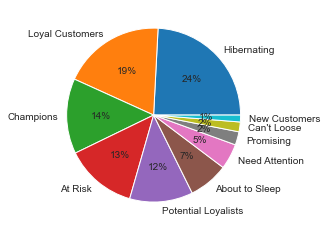

In [25]:
plt.pie(RFM['Segment'].value_counts(),
        labels=RFM['Segment'].value_counts().index,
        autopct='%.0f%%')
plt.show()

In [26]:
RFM_merge  = RFM[['CustomerID','RFM_SCORE','Segment']]

In [27]:
merged_df = pd.merge(df, RFM_merge, on='CustomerID')

In [28]:
total_buying_df = merged_df.groupby('CustomerID')['TotalAmount'].sum().reset_index()

total_buying_df = total_buying_df.rename(columns={'TotalAmount': 'TotalAmountSpent'})

buying_df = pd.merge(merged_df, total_buying_df, on='CustomerID')



In [29]:
total_quan_df = merged_df.groupby('CustomerID')['Quantity'].sum().reset_index()

total_quan_df = total_quan_df.rename(columns={'Quantity': 'TotalQuantity'})

buying_df = pd.merge(buying_df, total_quan_df, on='CustomerID')



In [30]:
df_user_de = buying_df[['CustomerID','Country','Segment','TotalAmountSpent','TotalQuantity']]
df_user_de  = df_user_de.drop_duplicates(subset='CustomerID')

In [31]:
df_user_de.head()

,CustomerID,Country,Segment,TotalAmountSpent,TotalQuantity
0,17850.0,United Kingdom,Can't Loose,5391.21,1733
297,13047.0,United Kingdom,Loyal Customers,3237.54,1391
469,12583.0,France,Champions,7281.38,5060
716,13748.0,United Kingdom,Hibernating,948.25,439
744,15100.0,United Kingdom,Hibernating,876.00,80


Hibernating            1049
Loyal Customers         826
Champions               606
At Risk                 580
Potential Loyalists     510
About to Sleep          321
Need Attention          205
Promising               107
Can't Loose              79
New Customers            55
Name: Segment, dtype: int64


<AxesSubplot:xlabel='Segment', ylabel='count'>

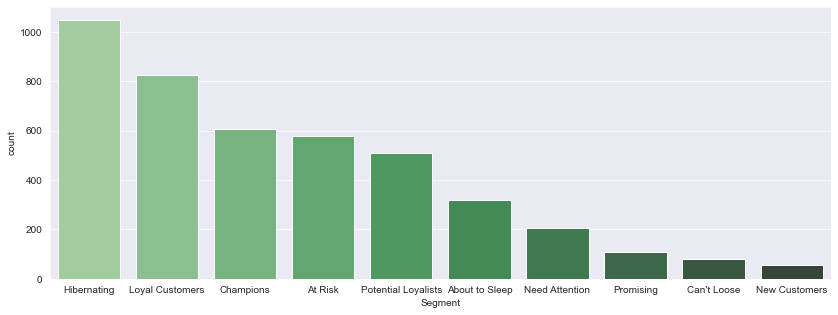

In [32]:
print(df_user_de['Segment'].value_counts())
plt.rcParams['figure.figsize'] = (14, 5)
sns.countplot(x='Segment', data=df_user_de,palette='Greens_d',order= df_user_de['Segment'].value_counts().index)


### AVG customers total amount spent

count      4338.0
mean       2054.0
std        8989.0
min           4.0
25%         307.0
50%         674.0
75%        1662.0
max      280206.0
Name: TotalAmountSpent, dtype: float64


<AxesSubplot:xlabel='TotalAmountSpent', ylabel='Density'>

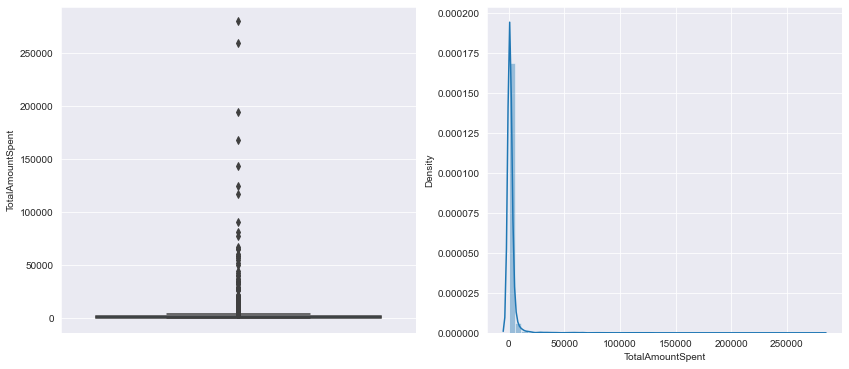

In [33]:
print(round(df_user_de['TotalAmountSpent'].describe()))

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(14,6))
sns.boxplot(y='TotalAmountSpent',data=df_user_de,ax=axis1)
sns.distplot(df_user_de['TotalAmountSpent'],ax=axis2)


### What's Yearly total amount and quantity sold?

In [34]:
merged_df[['InvoiceDate','Quantity','TotalAmount']].groupby(pd.Grouper(key="InvoiceDate", freq="Y")).sum()

,Quantity,TotalAmount
InvoiceDate,,
2010-12-31,312265,5.727139e+05
2011-12-31,4855547,8.338694e+06


### What country are the customers from?

In [35]:
df_user_de['Country'].value_counts()

United Kingdom          3920
Germany                   94
France                    87
Spain                     28
Belgium                   24
Switzerland               20
Portugal                  19
Italy                     14
Finland                   12
Norway                    10
Austria                    9
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    8
Sweden                     8
Japan                      8
Cyprus                     7
Poland                     6
Greece                     4
USA                        4
Canada                     4
Unspecified                4
Israel                     3
EIRE                       3
United Arab Emirates       2
Malta                      2
Bahrain                    2
Singapore                  1
Czech Republic             1
Brazil                     1
Lithuania                  1
Iceland                    1
European Community         1
Saudi Arabia  

In [36]:
# Count the occurrences of each country name
counts = df_user_de['Country'].value_counts().rename_axis('Country').reset_index(name='Counts')

# Load the world map data
world = go.Figure(go.Choropleth(
    locationmode = 'country names',
    locations = counts['Country'],
    z = counts['Counts'],
    text = counts['Country'],
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Count'
))

# Update the layout
world.update_layout(
    title_text='Marketing Places',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    )
)

# Show the plot
pyo.iplot(world)

### What country are the champion customers from?

In [41]:
champs =  df_user_de[df_user_de['Segment'] =='Champions']

In [45]:
print(champs['Country'].value_counts())
counts = champs['Country'].value_counts().rename_axis('Country').reset_index(name='Counts')

world = go.Figure(go.Choropleth(
    locationmode = 'country names',
    locations = counts['Country'],
    z = counts['Counts'],
    text = counts['Country'],
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Count'
))

world.update_layout(
    title_text='Countries with champoin customers',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    )
)

# Show the plot
pyo.iplot(world)

United Kingdom    556
France             16
Germany            13
Belgium             4
Portugal            4
EIRE                2
Finland             2
Norway              2
Spain               1
Iceland             1
Switzerland         1
Netherlands         1
Sweden              1
Denmark             1
Italy               1
Name: Country, dtype: int64


### Most Frequently bought product by customers of each segment 

In [43]:
counts = merged_df.groupby(['StockCode','Segment']).size().reset_index(name='Counts')

idx = counts.groupby(['Segment'])['Counts'].transform(max) == counts['Counts']

most_frequent = counts[idx]

print(most_frequent)

      StockCode              Segment  Counts
8151      22423       About to Sleep      32
13599     23188        New Customers       6
19079     84879       Need Attention      51
19082     84879            Promising      10
19986    85099B            Champions     816
20067    85123A              At Risk     220
20068    85123A          Can't Loose      88
20070    85123A          Hibernating     120
20071    85123A      Loyal Customers     638
21414      POST  Potential Loyalists     109


In [44]:
RFM[['Recency',	'Frequency','Monetary','Segment']].groupby('Segment').mean().sort_values('Monetary')


,Recency,Frequency,Monetary
Segment,,,
Promising,22.046729,7.186916,432.677290
About to Sleep,52.838006,15.616822,475.296854
Hibernating,210.665396,13.360343,528.653624
Need Attention,51.853659,40.775610,836.163902
Potential Loyalists,15.511765,34.221569,892.487727
At Risk,165.693103,55.641379,990.364397
Can't Loose,146.101266,179.544304,2417.355962
Loyal Customers,33.046005,154.351090,2833.545133
New Customers,5.709091,7.345455,3742.133091
